# Day 2

Today, we will start using nf-core pipelines to find differentially abundant genes in our dataset. 
We are using data from the following paper: https://www.nature.com/articles/s41593-023-01350-3#Sec10

1. Please take some time to read through the paper and understand their approach, hypotheses and goals.

What was the objective of the study?

The researchers wanted to understand how chronic opioid exposure and withdrawal affects pain-related behaviors in the context of pre-existing neuropathic pain induced by peripheral nerve injury (SNI mice), compared to pain-free control mice (sham-operated mice).

What do the conditions mean?

oxy: oxycodone injections


sal: Saline (control) injections

What do the genotypes mean?

SNI: mice that underwent the spared nerve injury (SNI) surgery to induce neuropathic pain


Sham: pain-free sham-operated control mice

Imagine you are the bioinformatician in the group who conducted this study. They hand you the raw files and ask you to analyze them.

What would you do?

Which groups would you compare to each other?

Please also mention which outcome you would expect to see from each comparison.

I would compare the Sham-Sal and SNI-Sal controls to the Sham-Oxy and SNI-Oxy groups, to investiagte the effect of the oxycodone injection on mice with pre-existing pain (SNI) vs pain-free mice (sham). Comparing Sham-Sal to Sham-oxy would reveal the effect of oxycodone in pain-free mice, whereas comparing SNI-Sal to SNI-oxy would reveal the effect of oxycodone in mice with pre-existing pain. If we can quantify the differene between Sham-Sal & Sham-oxy and compare it to the quantified difference between SNI-Sal & SNI-oxy, we can determine the effect of oxycodone on mice with pre-existing pain (SNI) vs pain-free mice (Sham). I would also compare the 2 Saline control groups (SNI-sal and Sham-sal), to determine the baseline effect of pre-existing pain.

Your group gave you a very suboptimal excel sheet (conditions_runs_oxy_project.xlsx) to get the information you need for each run they uploaded to the SRA.<br>
So, instead of directly diving into downloading the data and starting the analysis, you first need to sort the lazy table.<br>
Use Python and Pandas to get the table into a more sensible order.<br>
Then, perform some overview analysis and plot the results
1. How many samples do you have per condition?
2. How many samples do you have per genotype?
3. How often do you have each condition per genotype?

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("conditions_runs_oxy_project.xlsx")
print(df.sort_values(by=['Condition: Oxy', 'Genotype: SNI'], ascending=[True, True]))

   Patient          Run RNA-seq  DNA-seq condition: Sal Condition: Oxy  \
3        ?  SRR23195508       x      NaN            NaN              x   
4        ?  SRR23195509       x      NaN            NaN              x   
11       ?  SRR23195516       x      NaN            NaN              x   
12       ?  SRR23195517       x      NaN            NaN              x   
1        ?  SRR23195506       x      NaN            NaN              x   
6        ?  SRR23195511       x      NaN            NaN              x   
9        ?  SRR23195514       x      NaN            NaN              x   
14       ?  SRR23195519       x      NaN            NaN              x   
0        ?  SRR23195505       x      NaN              x            NaN   
5        ?  SRR23195510       x      NaN              x            NaN   
8        ?  SRR23195513       x      NaN              x            NaN   
13       ?  SRR23195518       x      NaN              x            NaN   
2        ?  SRR23195507       x      N

In [3]:
print("Nr. of samples per condition:")
print("Nr. of Sal samples:", df['condition: Sal'].count())
print("Nr. of Oxy samples:",df['Condition: Oxy'].count())

Nr. of samples per condition:
Nr. of Sal samples: 8
Nr. of Oxy samples: 8


In [4]:
print("Nr. of samples per genotype:")
print("Nr. of SNI samples:", df['Genotype: SNI'].count())
print("Nr. of Sham samples:",df['Genotype: Sham'].count())

Nr. of samples per genotype:
Nr. of SNI samples: 8
Nr. of Sham samples: 8


                Condition: Sal  Condition: Oxy
Genotype: SNI                4               4
Genotype: Sham               4               4


<Figure size 800x600 with 0 Axes>

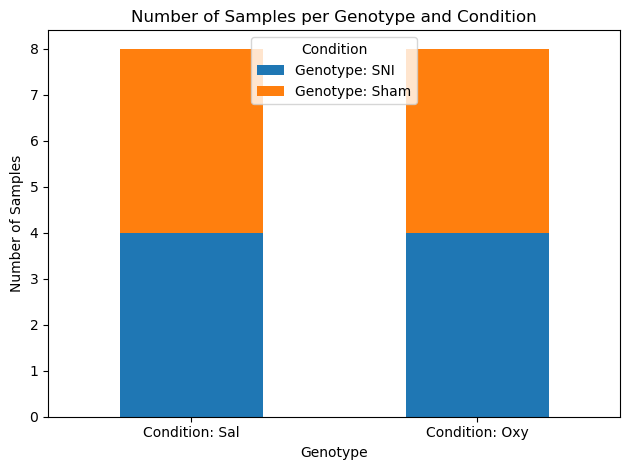

In [5]:
import matplotlib.pyplot as plt

sal_sni_count = ((df['Genotype: SNI'] == 'x') & (df['condition: Sal'] == 'x')).sum()
oxy_sni_count = ((df['Genotype: SNI'] == 'x') & (df['Condition: Oxy'] == 'x')).sum()

sal_sham_count = ((df['Genotype: Sham'] == 'x') & (df['condition: Sal'] == 'x')).sum()
oxy_sham_count = ((df['Genotype: Sham'] == 'x') & (df['Condition: Oxy'] == 'x')).sum()


genotype_condition = pd.DataFrame({
    'Condition: Sal': [sal_sni_count, sal_sham_count],
    'Condition: Oxy': [oxy_sni_count, oxy_sham_count]
}, index=['Genotype: SNI', 'Genotype: Sham'])

print(genotype_condition)

# Plotting
plt.figure(figsize=(8, 6))
genotype_condition.T.plot(kind='bar', stacked=True)
plt.title('Number of Samples per Genotype and Condition')
plt.xlabel('Genotype')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.legend(title='Condition', loc='upper center')
plt.tight_layout()
plt.show()

They were so kind to also provide you with the information of the number of bases per run, so that you can know how much space the data will take on your Cluster.<br>
Add a new column to your fancy table with this information (base_counts.csv) and sort your dataframe according to this information and the condition.

Then select the 2 smallest runs from your dataset and download them from SRA (maybe an nf-core pipeline can help here?...)

In [6]:
base_counts = pd.read_csv("base_counts.csv")
print(base_counts.head())

           Run       Bases
0  SRR23195505  6922564500
1  SRR23195506  7859530800
2  SRR23195507  8063298900
3  SRR23195508  6927786900
4  SRR23195509  7003550100


In [7]:
merged_df = pd.merge(df, base_counts, on='Run', how='left')
merged_df = merged_df.sort_values(by=['Bases'], ascending=[True])
print(merged_df)

   Patient          Run RNA-seq  DNA-seq condition: Sal Condition: Oxy  \
11       ?  SRR23195516       x      NaN            NaN              x   
6        ?  SRR23195511       x      NaN            NaN              x   
12       ?  SRR23195517       x      NaN            NaN              x   
0        ?  SRR23195505       x      NaN              x            NaN   
3        ?  SRR23195508       x      NaN            NaN              x   
14       ?  SRR23195519       x      NaN            NaN              x   
4        ?  SRR23195509       x      NaN            NaN              x   
9        ?  SRR23195514       x      NaN            NaN              x   
5        ?  SRR23195510       x      NaN              x            NaN   
7        ?  SRR23195512       x      NaN              x            NaN   
15       ?  SRR23195520       x      NaN              x            NaN   
1        ?  SRR23195506       x      NaN            NaN              x   
13       ?  SRR23195518       x      N

In [8]:
smallest_runs = merged_df.nsmallest(2, 'Bases')['Run']
print(smallest_runs)

11    SRR23195516
6     SRR23195511
Name: Run, dtype: object


In [9]:
smallest_runs.to_csv('smallest_runs.csv', header=False, index=False)

In [16]:
!nextflow run nf-core/fetchngs -profile docker --input smallest_runs.csv --outdir files --max_memory=8GB -resume


 N E X T F L O W   ~  version 24.04.4

Launching `https://github.com/nf-core/fetchngs` [festering_yonath] DSL2 - revision: 8ec2d934f9 [master]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/fetchngs v1.12.0-g8ec2d93
------------------------------------------------------
Core Nextflow options
  revision       : master
  runName        : festering_yonath
  containerEngine: docker
  launchDir      : /Users/Jessie/PycharmProjects/comp_workflows/day2
  workDir        : /Users/Jessie/PycharmProjects/comp_workflows/day2/work
  projectDir     : /Users/Jessie/.nextflow/assets/nf-core/fetchngs
  userName  

Due to long runtimes on my PC, I received the files from a friend.

While your files are downloading, get back to the paper and explain how you would try to reproduce the analysis.<br>
When you are done with this shout, so we can discuss the different ideas.

I would try reproduce the analysis by using an nf-core pipeline (probably nf-core/rnaseq, since the authors are analyzing gene expression from RNA-sequencing data). With this pipeline I could compare the gene expression levels (transcriptional activity) across different brain regions. This would reveal transcriptional profiles associated with the treatment or withdrawal conditions.